<a href="https://colab.research.google.com/github/saraleh/Automatic-Fact-Checking/blob/main/machine_learning_TEMOUDEN_and_LEHOAUOUI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Identification du groupe
Groupe 20.
TEMOUDEN Kaotar : 21717901
LEHOUAOUI Sara : 21807688

## Installation

In [ ]:
!pip install langdetect 
!pip install contractions

     |████████████████████████████████| 981 kB 4.9 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=1fdd5b3c34046e553c779d2f7dd5a71085f5837589d560c0d89e70feee2e4155
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
     |████████████████████████████████| 287 kB 4.8 MB/s 
     |████████████████████████████████| 106 kB 70.3 MB/s 


In [ ]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle 
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys

In [ ]:
## Librairies NLP

import contractions

# librairie BeautifulSoup
from bs4 import BeautifulSoup

# detection de language
import langdetect 

import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from nltk import RegexpParser
# il est possible de charger l'ensemble des librairies en une seule fois 
# décocher le commentaire de la ligne ci-dessous
#nltk.download('all') 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
nltk.download('tagsets')
nltk.download("stopwords")
nltk.download('wordnet')

from nltk.corpus import stopwords

# import spacy
# from spacy.tokens import Span
# # il faut sélectionner pour quelle langue les traitements vont être faits.
# nlp = spacy.load('en')
# from spacy.lang.fr import French


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
## librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

In [ ]:
# pour monter son drive Google Drive local
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# my_local_drive = '/content/gdrive/My Drive/MLprojet'
my_local_drive = '/content/gdrive/My Drive/MLprojet/'

In [ ]:
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/.shortcut-targets-by-id/1bfScJzPdQFV6wVNtI4-ypTJhaThcLaKV/MLprojet


'/content/gdrive/.shortcut-targets-by-id/1bfScJzPdQFV6wVNtI4-ypTJhaThcLaKV/MLprojet'

In [ ]:
# fonctions utilities (affichage, confusion, etc.)
from MyNLPUtilities import *

In [ ]:
## Afficher le contenu du dossier
!ls

 claimskg_result.csv   mltest1.ipynb	   'Projet Machine Learning.gdoc'
 Essai.ipynb	      'mltest2 (3).ipynb'   __pycache__
 MLmoodle	       MyNLPUtilities.py   'RENDU FINAL'


## Exploration du jeu de données

In [ ]:
df = pd.read_csv("claimskg_result.csv", sep=",")
df.shape


(10000, 14)

In [ ]:
df.head()

,id,text,date,truthRating,ratingName,author,headline,named_entities_claim,named_entities_article,keywords,source,sourceURL,link,language
0,http://data.gesis.org/claimskg/claim_review/be...,Malia Obama cashed a $1.2 million tax refund c...,Unknown,-1,OTHER,Unknown,Did Malia Obama Cash a $1.2 Million Check?,"Facebook,Fan Fiction,Junk News,Malia Obama,Sno...",Malia Obama,NaN,truthorfiction,https://www.truthorfiction.com,https://www.truthorfiction.com/did-malia-obama...,English
1,http://data.gesis.org/claimskg/claim_review/8a...,High diver is saved from jumping into a draine...,Unknown,-1,OTHER,Unknown,High Diver Saved By Cross,"Cincinnati Post,Islam,Scripture lesson,Univers...",shadow on the wall,ASP Article,snopes,http://www.snopes.com,https://www.snopes.com/fact-check/high-and-mig...,English
2,http://data.gesis.org/claimskg/claim_review/c2...,'And the revenue generated by drilling off Vir...,2012-02-15,2,MIXTURE,Jim Moran,Moran says drilling off Virginia's coast will ...,"Alaska,American Petroleum Institute,Atlantic O...",NaN,"Energy,State Finances",politifact,http://www.politifact.com,http://www.politifact.com/virginia/statements/...,English
3,http://data.gesis.org/claimskg/claim_review/1e...,Health insurance companies pay CEOs $24 millio...,2009-09-15,2,MIXTURE,Health Care for America Now,Health care advocacy group blasts insurers for...,"Aetna,Assurant,Bloomberg News,Cigna,Coventry H...",NaN,"Corporations,Health Care",politifact,http://www.politifact.com,http://www.politifact.com/truth-o-meter/statem...,English
4,http://data.gesis.org/claimskg/claim_review/0b...,Ted Cruz said that veterans should start selli...,Unknown,1,FALSE,Unknown,Ted Cruz: Vets Should Sell Cookies for Funding...,"David Nelson,James Morrison,John Scalzi,Republ...",Ted Cruz,"ASP Article, Not Necessarily The News",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/cruz-cookies/,English


In [ ]:
## Répartion des valeurs du ratingName
df.ratingName.value_counts()

FALSE      3552
MIXTURE    3144
OTHER      2019
TRUE       1285
Name: ratingName, dtype: int64

In [ ]:
df.isna().mean()

id                        0.0000
text                      0.0000
date                      0.0000
truthRating               0.0000
ratingName                0.0000
author                    0.0000
headline                  0.0434
named_entities_claim      0.0451
named_entities_article    0.3536
keywords                  0.1265
source                    0.0000
sourceURL                 0.0000
link                      0.0000
language                  0.0000
dtype: float64

In [ ]:
## Création d'un échantillon avec 300 claims vrais et 300 faux
TrueRating = df.loc[df.ratingName== "TRUE" ].head(300)
print(TrueRating.shape)

FalseRating = df.loc[df.ratingName== "FALSE" ].head(300)
print(FalseRating.shape)

MixtureRating = df.loc[df.ratingName== "MIXTURE" ].head(600)
print(MixtureRating.shape)



# Concatenation des jeux de données
dfeq = pd.concat([TrueRating,FalseRating,MixtureRating], ignore_index= True)
dfeq.shape
          

(300, 14)
(300, 14)
(600, 14)


(1200, 14)

In [ ]:
dfeq.isna().mean()

id                        0.000000
text                      0.000000
date                      0.000000
truthRating               0.000000
ratingName                0.000000
author                    0.000000
headline                  0.000000
named_entities_claim      0.000833
named_entities_article    0.385833
keywords                  0.052500
source                    0.000000
sourceURL                 0.000000
link                      0.000000
language                  0.000000
dtype: float64

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import plotly.express as px
from scipy import sparse as sp
X = dfeq['text']
y=dfeq['ratingName']
tfidf = TfidfVectorizer(ngram_range=(1,1))#, max_features=50)




vector_tfidf = tfidf.fit_transform(X)
#pca = PCA(n_components=2)
#X = sp.rand(1000,1000, density=0.0001)
clf = TruncatedSVD(2)
XSVD = clf.fit_transform(vector_tfidf)

#components = pca.fit_transform(vector_tfidf)
fig = px.scatter(XSVD, x=0, y=1, color= y, hover_data=[dfeq.index])
fig.show()




## Ingénierie des données

### Pré-traitements des données textuelles

In [ ]:


import re
import string

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

def MyCleanText(X, 
               lowercase=False, # mettre en minuscule
               removestopwords=False, # supprimer les stopwords
               removedigit=False, # supprimer les nombres  
               getstemmer=False, # conserver la racine des termes
               getlemmatisation=False # lematisation des termes 
              ):
    
    sentence=str(X)

    # suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)
    if lowercase:
          tokens = [token.lower() for token in tokens]

    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]

    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppression des tokens numerique
    if removedigit:
        words = [word for word in words if not word.isdigit()]

    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

    # lemmatisation
    if getlemmatisation:
        lemmatizer=WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word)for word in words]
        

    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]
        
    sentence= ' '.join(words)
  
    return sentence   

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# tester la fonction clean text

texte = """This is an example of using the Function MyCleanText before creating a vector created, \
          this text has some problems like 1 c or even numbers like 13 and we have corpora"""

print ('Utilisation de MyCleanText avec convertion en minuscule, suppression de stopwords et en mettant sous la forme de lemmes')
print (MyCleanText(texte,lowercase=True,getlemmatisation=True, removestopwords=True),'\n')

Utilisation de MyCleanText avec convertion en minuscule, suppression de stopwords et en mettant sous la forme de lemmes
example using function mycleantext creating vector created text problem like 1 even number like 13 corpus 



#### Les estimateurs et Transformer

In [ ]:
## Comme vu dans le cours et les Notebooks disponibles sur Moodle, on va utiliser les estimateurs et Transformer

from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 removedigit=False, # supprimer les nombres  
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False # lemmatisation des termes  
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.removedigit=removedigit

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [MyCleanText(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            removedigit=self.removedigit) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'removedigit':self.removedigit
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    


In [ ]:
texte = ["This is an example of TfidfVectorizer for creating a vector",
        "This is another example of TfidfVectorizer",
        "but before we apply a preprocessing"]

print ("texte avant ",texte)
# il suffit de créer un objet de la classe TextNormalizer
text_normalizer=TextNormalizer(lowercase=True, removestopwords=True)  
# d'appliquer fit.transform pour appliquer les pré-traitements
text_cleaned=text_normalizer.fit_transform(texte)
print ("texte après application des pré-traitements")
print (text_cleaned)   

texte avant  ['This is an example of TfidfVectorizer for creating a vector', 'This is another example of TfidfVectorizer', 'but before we apply a preprocessing']
texte après application des pré-traitements
['example tfidfvectorizer creating vector', 'another example tfidfvectorizer', 'apply preprocessing']


#### Application sur notre jeu de données

In [ ]:
# # On définit notre normalizer
# normalizer=TextNormalizer(lowercase=True, removestopwords=True, removedigit=True, getstemmer=True)

# original_text = list(dfeq.text)
# text_cleaned = normalizer.fit_transform(original_text)

# original_title = list(dfeq.headline)
# title_cleaned = normalizer.fit_transform(original_title)

# df_after_preprocessing = dfeq.copy()

# df_after_preprocessing['cleaned_text'] = text_cleaned
# df_after_preprocessing['cleaned_headline'] = title_cleaned

In [ ]:
# On définit notre normalizer
normalizer=TextNormalizer(lowercase=True, removestopwords=True, removedigit=True, getstemmer=True)

# On définit les champs text à traiter
columns_to_process = ["text", "headline"] #"keywords", "named_entities_claim", "named_entities_article" 

df_after_preprocessing = dfeq.copy()

for col in columns_to_process :
  print("Processing {} ...".format(col))
  original_text = list(dfeq[col])
  text_cleaned = normalizer.fit_transform(original_text)
  df_after_preprocessing['cleaned_'+col] = text_cleaned



Processing text ...
Processing headline ...


In [ ]:
df_after_preprocessing

,id,text,date,truthRating,ratingName,author,headline,named_entities_claim,named_entities_article,keywords,source,sourceURL,link,language,cleaned_text,cleaned_headline
0,http://data.gesis.org/claimskg/claim_review/ad...,'There’s no money' for Planned Parenthood in t...,2015-09-27,3,TRUE,Tom Cole,Is there Planned Parenthood funding in the bil...,"Children’s Health Insurance Program,Fox News S...",Planned Parenthood,"Abortion,Congress,Congressional Rules,Federal ...",politifact,http://www.politifact.com,http://www.politifact.com/truth-o-meter/statem...,English,money plan parenthood bill would keep govern open,plan parenthood fund bill stop govern shutdown
1,http://data.gesis.org/claimskg/claim_review/f0...,Fox News included an image of singer Patti LaB...,Unknown,3,TRUE,Unknown,Did Fox News Use an Image of Patti LaBelle Dur...,"Aretha Franklin,Fox News,Over the Rainbow,Patt...","Aretha Franklin,Fox News,Patti LaBelle","aretha franklin, fox news, patti labelle",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/fox-patti-la...,English,fox news includ imag singer patti label instea...,fox news use imag patti label aretha franklin ...
2,http://data.gesis.org/claimskg/claim_review/24...,'I've cast a couple of 99-1 votes' and been th...,2007-09-07,3,TRUE,Fred Thompson,Federalist Fred,"Fred Thompson,Give me,No Child Left Behind Act...",NaN,Candidate Biography,politifact,http://www.politifact.com,http://www.politifact.com/truth-o-meter/statem...,English,cast coupl vote lone dissent,federalist fred
3,http://data.gesis.org/claimskg/claim_review/4e...,Says people who signed recall petitions agains...,2011-04-29,3,TRUE,Kim Simac,Wisconsin tea party leader says Democrat-hired...,"Democrat,Eagle River,Jim Holperin,PolitiFact,R...",Jim Holperin,"Elections,State Budget",politifact,http://www.politifact.com,http://www.politifact.com/wisconsin/statements...,English,say peopl sign recal petit wisconsin state sen...,wisconsin tea parti leader say democrat hire t...
4,http://data.gesis.org/claimskg/claim_review/32...,Obama has 'visited more countries and met with...,2009-11-19,3,TRUE,Chain email,Chain e-mail claims Obama has visited more cou...,"Barack Obama,Bill Clinton,Brendan Doherty,CBS ...",NaN,Foreign Policy,politifact,http://www.politifact.com,http://www.politifact.com/truth-o-meter/statem...,English,obama visit countri met world leader presid fi...,chain mail claim obama visit countri first six...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,http://data.gesis.org/claimskg/claim_review/82...,Says Jeff Reardon cut elementary school music ...,2012-05-08,2,MIXTURE,Mike Schaufler,Did Jeff Reardon cut school programs and vote ...,"David Douglas High School,David Douglas School...",Jeff Reardon,"Education,Message Machine 2012,Voting Record",politifact,http://www.politifact.com,http://www.politifact.com/oregon/statements/20...,English,say jeff reardon cut elementari school music c...,jeff reardon cut school program vote rais scho...
1196,http://data.gesis.org/claimskg/claim_review/eb...,Seniors with coverage under Medicare Advantage...,2009-10-15,2,MIXTURE,America's Health Insurance Plans,Health insurers' group says Medicare Advantage...,"America's Health Insurance Plans,CBO,Commonwea...",Medicare Advantage,"Health Care,Medicare",politifact,http://www.politifact.com,http://www.politifact.com/truth-o-meter/statem...,English,senior coverag medicar advantag give share hea...,health insur group say medicar advantag benefi...
1197,http://data.gesis.org/claimskg/claim_review/94...,Filmmaker Michael Moore called American Sniper...,Unknown,2,MIXTURE,Unknown,Michael Moore Called Chris Kyle a Coward?,"American Sniper,Chris Kyle,Facebook,Hollywood ...","American Sniper,Chris Kyle,Michael Moore",ASP Article,snopes,http://www.snopes.com,https://www.snopes.com/fact-check/american-sni...,English,filmmak michael moor call american sniper subj...,michael moor call chri kyle coward
1198,http://data.gesis.org/claimskg/claim_revi

### Véctorisation 

#### L'approche via TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# pour l'enchainer avec un tf-idf : 
tfidf = TfidfVectorizer(ngram_range=(1,1))#, max_features=50)

text_cleaned = df_after_preprocessing['cleaned_text']
vector_tfidf = tfidf.fit_transform(text_cleaned)
print ("texte transformé en vecteur tf-idf")

df = pd.DataFrame(
    data=tfidf.transform(text_cleaned).toarray(),
    columns=tfidf.get_feature_names()
)

display(df)

texte transformé en vecteur tf-idf


,101st,14th,15th,1920,19th,20week,21t,2nd,30,30th,...,youngster,youth,yucca,zambian,zealand,zero,zimmerman,zipper,zone,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Utilisation des pipelines

In [ ]:
from sklearn.pipeline import Pipeline

# création du pipeline
normalizer=TextNormalizer(lowercase=True, removestopwords=True, removedigit=True, getstemmer=True)
tfidf = TfidfVectorizer(ngram_range=(1,1), max_features=1000)

pipe = Pipeline([("cleaner", normalizer),
                 ("tfidf", tfidf)])

# Appliquer le pipeline sur les champs selectionnés
columns_to_process = ["text", "headline"]

dict_df_pipe = {}

#  on crée deux pipelines : une pour headline, et l'autre pour text
for col in columns_to_process :
  X = dfeq[col]
  pipe.fit(X)
  pipe.transform(X)

# creation du dataframe pour affichage
  columns = pipe['tfidf'].get_feature_names()
  columns = [col+'_'+c for c in columns]
  df_pipe = pd.DataFrame(
      data=pipe.transform(X).toarray(),
      columns=columns
  )

  # Stocker les features de chaque colonne
  dict_df_pipe[col] = df_pipe

#### Tester les pré-traitements sur 'text'

In [ ]:
from sklearn.pipeline import Pipeline

# création du pipeline
normalizer=TextNormalizer(lowercase=True, removestopwords=True, removedigit=True, getstemmer=True)
tfidf = TfidfVectorizer(ngram_range=(1,1), max_features=1000)

pipe = Pipeline([("cleaner", normalizer),
                 ("tfidf", tfidf)])

# Appliquer le pipeline sur les champs selectionnés
X = dfeq["text"]
pipe.fit(X)
#X=pipe.transform(X)

columns = pipe['tfidf'].get_feature_names()

df_pipe_textAll = pd.DataFrame(
      data=pipe.transform(X).toarray(),
      columns=columns

 )





 


In [ ]:


# création du pipeline
normalizer=TextNormalizer(lowercase=True, removestopwords=True, removedigit=True, getstemmer=False)
tfidf = TfidfVectorizer(ngram_range=(1,1), max_features=1000)

pipe = Pipeline([("cleaner", normalizer),
                 ("tfidf", tfidf)])

# Appliquer le pipeline sur les champs selectionnés
X = dfeq["text"]
pipe.fit(X)
#X=pipe.transform(X)

columns = pipe['tfidf'].get_feature_names()

df_pipe_text_NoStemmer = pd.DataFrame(
      data=pipe.transform(X).toarray(),
      columns=columns

 )



In [ ]:
# création du pipeline
normalizer=TextNormalizer(lowercase=False, removestopwords=False, removedigit=True, getstemmer=False)
tfidf = TfidfVectorizer(ngram_range=(1,1), max_features=1000)

pipe = Pipeline([("cleaner", normalizer),
                 ("tfidf", tfidf)])

# Appliquer le pipeline sur les champs selectionnés
X = dfeq["text"]
pipe.fit(X)
#X=pipe.transform(X)

columns = pipe['tfidf'].get_feature_names()

df_pipe_text_Basique = pd.DataFrame(
      data=pipe.transform(X).toarray(),
      columns=columns

 )

In [ ]:
from sklearn.pipeline import Pipeline

# création du pipeline
normalizer=TextNormalizer(lowercase=True, removestopwords=True, removedigit=True, getstemmer=True)
tfidf = TfidfVectorizer(ngram_range=(1,1))#,max_features=1000)

pipe = Pipeline([("cleaner", normalizer),
                 ("tfidf", tfidf)])

# Appliquer le pipeline sur les champs selectionnés
X = dfeq["text"]
pipe.fit(X)
#X=pipe.transform(X)

columns = pipe['tfidf'].get_feature_names()

df_pipe_textAllFeatures = pd.DataFrame(
      data=pipe.transform(X).toarray(),
      columns=columns

 )

#### Tester les pré-traitements sur 'headline'

In [ ]:
from sklearn.pipeline import Pipeline

# création du pipeline
normalizer=TextNormalizer(lowercase=True, removestopwords=True, removedigit=True, getstemmer=True)
tfidf = TfidfVectorizer(ngram_range=(1,1),max_features=1000)

pipe = Pipeline([("cleaner", normalizer),
                 ("tfidf", tfidf)])

# Appliquer le pipeline sur les champs selectionnés
X = dfeq["headline"]
pipe.fit(X)
#X=pipe.transform(X)

columns = pipe['tfidf'].get_feature_names()

df_pipe_headlineAll = pd.DataFrame(
      data=pipe.transform(X).toarray(),
      columns=columns

 )






In [ ]:
from sklearn.pipeline import Pipeline

# création du pipeline
normalizer=TextNormalizer(lowercase=True, removestopwords=True, removedigit=True, getstemmer=True)
tfidf = TfidfVectorizer(ngram_range=(1,1))#,max_features=1000)

pipe = Pipeline([("cleaner", normalizer),
                 ("tfidf", tfidf)])

# Appliquer le pipeline sur les champs selectionnés
X = dfeq["headline"]
pipe.fit(X)
#X=pipe.transform(X)

columns = pipe['tfidf'].get_feature_names()

df_pipe_headlineAllFeatures = pd.DataFrame(
      data=pipe.transform(X).toarray(),
      columns=columns

 )


In [ ]:
# création du pipeline
normalizer=TextNormalizer(lowercase=True, removestopwords=True, removedigit=True, getstemmer=False)
tfidf = TfidfVectorizer(ngram_range=(1,1), max_features=1000)

pipe = Pipeline([("cleaner", normalizer),
                 ("tfidf", tfidf)])

# Appliquer le pipeline sur les champs selectionnés
X = dfeq["headline"]
pipe.fit(X)
#X=pipe.transform(X)

columns = pipe['tfidf'].get_feature_names()

df_pipe_headline_NoStemmer = pd.DataFrame(
      data=pipe.transform(X).toarray(),
      columns=columns

 )

In [ ]:
# création du pipeline
normalizer=TextNormalizer(lowercase=False, removestopwords=False, removedigit=True, getstemmer=False)
tfidf = TfidfVectorizer(ngram_range=(1,2),max_features=1000)

pipe = Pipeline([("cleaner", normalizer),
                 ("tfidf", tfidf)])

# Appliquer le pipeline sur les champs selectionnés
X = dfeq["headline"]
pipe.fit(X)
#X=pipe.transform(X)

columns = pipe['tfidf'].get_feature_names()

df_pipe_headline_Basique = pd.DataFrame(
      data=pipe.transform(X).toarray(),
      columns=columns

 )

## Classification 


### VRAI VS FAUX

In [ ]:
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate


dfeq['is_fake'] = dfeq.ratingName.apply(lambda x : 1 if x=='FALSE' else 0)




In [ ]:
def getCVScore(name,X,y, cv= 5):
  
  # Liste de tous les modeles à tester
  all_models = [
  ("SVC_"+ name, SVC()),
  ("RF_"+name, RandomForestClassifier()),
  ("LR_"+name, LogisticRegression(solver='lbfgs')) ]
            
          

  # Evaluation des differents pipelines
  print ("Evaluation de la configuration  : " + name)
  f1_scores = [(name , cross_val_score(model, X, y, cv=cv, scoring ='f1').mean()) for name, model in all_models]
  accuracy_scores = [(name , cross_val_score(model, X, y, cv=cv, scoring ='accuracy').mean()) for name, model in all_models]
  return f1_scores, accuracy_scores
  
 




In [ ]:
# on récupère les indices des observations avec ratingName == Mixture

index_Mixture = dfeq.loc[dfeq.ratingName == 'MIXTURE'].index
index_Mixture

Int64Index([ 600,  601,  602,  603,  604,  605,  606,  607,  608,  609,
            ...
            1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199],
           dtype='int64', length=600)

In [ ]:
score_f1 = []
score_accuracy = []

df_pipe_headline_text = pd.concat ([df_pipe_headlineAll, df_pipe_textAll], axis = 1)
AllConfig = [
             ('textAll',df_pipe_textAll.drop(index_Mixture)),
              ('TextAllFeatures',df_pipe_textAllFeatures.drop(index_Mixture)),
              ('text_NoStemmer',df_pipe_text_NoStemmer.drop(index_Mixture)),
              ('text_Basique',df_pipe_text_Basique.drop(index_Mixture)),
              ('headlineAll',df_pipe_headlineAll.drop(index_Mixture)),
              ('headlineAllFeatures',df_pipe_headlineAllFeatures.drop(index_Mixture)),
              ('headline_NoStemmer',df_pipe_headline_NoStemmer.drop(index_Mixture)),
              ('headline_Basique',df_pipe_headline_Basique.drop(index_Mixture)),
              ('headline_text',df_pipe_headline_text.drop(index_Mixture))

]
y =  dfeq.drop(index_Mixture).is_fake

for model,x in AllConfig :
  f1, acc = getCVScore(model,x,y)
  score_f1.extend(f1)
  score_accuracy.extend(acc)

df_f1 = pd.DataFrame(score_f1, columns = ['model', 'f1_score'])
df_acc = pd.DataFrame(score_accuracy, columns = ['model', 'acc_score'])

df_res = df_f1.merge(df_acc, on= 'model')




Evaluation de la configuration  : textAll
Evaluation de la configuration  : TextAllFeatures
Evaluation de la configuration  : text_NoStemmer
Evaluation de la configuration  : text_Basique
Evaluation de la configuration  : headlineAll
Evaluation de la configuration  : headlineAllFeatures
Evaluation de la configuration  : headline_NoStemmer
Evaluation de la configuration  : headline_Basique
Evaluation de la configuration  : headline_text


In [ ]:
df_res.sort_values('f1_score', ascending = False)


,model,f1_score,acc_score
16,RF_headlineAllFeatures,0.674356,0.611667
4,RF_TextAllFeatures,0.646700,0.570000
3,SVC_TextAllFeatures,0.638319,0.611667
7,RF_text_NoStemmer,0.634916,0.583333
15,SVC_headlineAllFeatures,0.628499,0.595000
20,LR_headline_NoStemmer,0.622631,0.606667
9,SVC_text_Basique,0.622009,0.625000
19,RF_headline_NoStemmer,0.621125,0.581667
11,LR_text_Basique,0.619289,0.616667
10,RF_text_Basique,0.616085,0.575000


Accuracy : 0.506
Classification Report
              precision    recall  f1-score   support

           0    0.63636   0.21429   0.32061        98
           1    0.47619   0.85366   0.61135        82

    accuracy                        0.50556       180
   macro avg    0.55628   0.53397   0.46598       180
weighted avg    0.56340   0.50556   0.45306       180



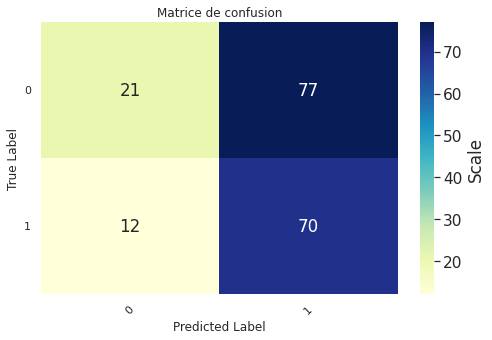

In [ ]:


from sklearn.model_selection import train_test_split



X_final = df_pipe_headlineAllFeatures.drop(index_Mixture)
y =  dfeq.drop(index_Mixture).is_fake
X_train, X_test, y_train, y_test = train_test_split(
      X_final, y, test_size=0.3, random_state=42)



# création de l'estimateur 

clf = RandomForestClassifier()
clf.fit( X_train,y_train)

y_pred = clf.predict(X_test)

MyshowAllScores(y_test,y_pred)



In [ ]:
def plotImportance(X_final,y,n = 10):

  # random forest for feature importance on a classification problem


  # define the model
  model = RandomForestClassifier()
  # fit the model
  model.fit(X_final, y)
  # get importance
  importance = model.feature_importances_
  ls_importance = list(zip(X_final.columns, importance))
  # print(ls_importance)
  ls_importance = sorted(ls_importance, key=lambda x: -x[1])
  topImportance =ls_importance[:n]
  # plot feature top10Importance
  # pyplot.bar([x for x in range(len(top10Importance))], top10Importance)
  # pyplot.show()
  df_impo = pd.DataFrame(topImportance, columns= ['names', 'featuresImportance'])
  df_impo.set_index('names').plot(kind = 'bar',figsize=(10, 10) )
  plt.show()



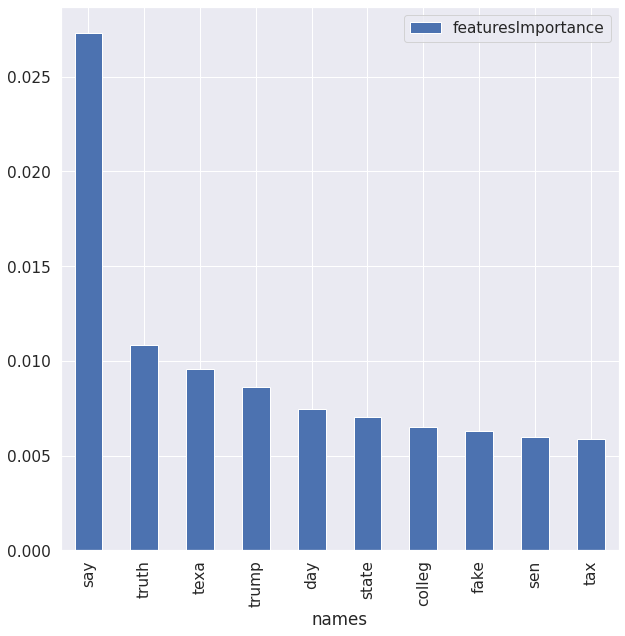

In [ ]:
plotImportance(df_pipe_headlineAllFeatures.drop(index_Mixture),
               dfeq.drop(index_Mixture).is_fake)

In [ ]:
# df_impo.index

### VRAI ou FAUX VS. MIXTURE

In [ ]:
dfeq['is_Mix'] = dfeq.ratingName.apply(lambda x : 1 if x=='MIXTURE' else 0)
y = dfeq.is_Mix
          

In [ ]:
score_f1 = []
score_accuracy = []

df_pipe_headline_text = pd.concat ([df_pipe_headlineAll, df_pipe_textAll], axis = 1)
AllConfig = [
             ('textAll',df_pipe_textAll),
              ('TextAllFeatures',df_pipe_textAllFeatures),
              ('text_NoStemmer',df_pipe_text_NoStemmer),
              ('text_Basique',df_pipe_text_Basique),
              ('headlineAll',df_pipe_headlineAll),
              ('headlineAllFeatures',df_pipe_headlineAllFeatures),
              ('headline_NoStemmer',df_pipe_headline_NoStemmer),
              ('headline_Basique',df_pipe_headline_Basique),
              ('headline_text',df_pipe_headline_text)

]


for model,x in AllConfig :
  f1, acc = getCVScore(model,x,y)
  score_f1.extend(f1)
  score_accuracy.extend(acc)

df_f1 = pd.DataFrame(score_f1, columns = ['model', 'f1_score'])
df_acc = pd.DataFrame(score_accuracy, columns = ['model', 'acc_score'])

df_res_Mixture = df_f1.merge(df_acc, on= 'model')




Evaluation de la configuration  : textAll
Evaluation de la configuration  : TextAllFeatures
Evaluation de la configuration  : text_NoStemmer
Evaluation de la configuration  : text_Basique
Evaluation de la configuration  : headlineAll
Evaluation de la configuration  : headlineAllFeatures
Evaluation de la configuration  : headline_NoStemmer
Evaluation de la configuration  : headline_Basique
Evaluation de la configuration  : headline_text


In [ ]:
df_res_Mixture.sort_values('f1_score', ascending = False)

,model,f1_score,acc_score
24,SVC_headline_text,0.668404,0.659167
26,LR_headline_text,0.647468,0.646667
12,SVC_headlineAll,0.645106,0.632500
6,SVC_text_NoStemmer,0.643515,0.632500
13,RF_headlineAll,0.637433,0.641667
9,SVC_text_Basique,0.630382,0.615833
18,SVC_headline_NoStemmer,0.630291,0.614167
0,SVC_textAll,0.626240,0.622500
15,SVC_headlineAllFeatures,0.624408,0.640833
3,SVC_TextAllFeatures,0.623494,0.640000


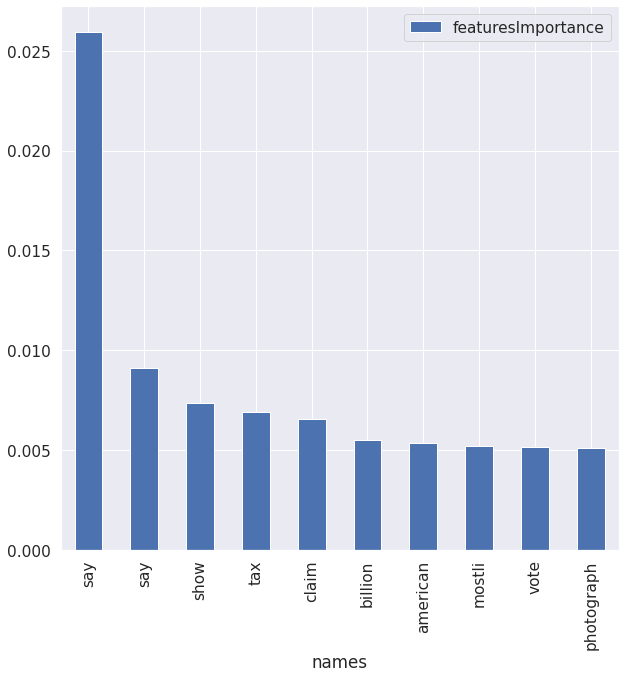

In [ ]:
plotImportance(df_pipe_headline_text,
               dfeq.is_Mix)

### VRAI VS FAUX VS MIXTURE


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def getCVScore_MultiClass(name,X,y, cv= 5):
  
  # Liste de tous les modeles à tester
  all_models = [
  ("GNB_"+ name, GaussianNB()),
  ("RF_"+name, RandomForestClassifier()),
  ("SVC_"+name, SVC()),
  ("KNN_"+name, KNeighborsClassifier(n_neighbors = 3))
   ]
            
          

  # Evaluation des differents pipelines
  print ("Evaluation de la configuration  : " + name)
  f1_scores = [(name , cross_val_score(model, X, y, cv=cv, scoring ='f1_weighted').mean()) for name, model in all_models]
  accuracy_scores = [(name , cross_val_score(model, X, y, cv=cv, scoring ='accuracy').mean()) for name, model in all_models]
  return f1_scores, accuracy_scores
  
 




In [ ]:
index_Mixture = dfeq.loc[dfeq.ratingName == 'MIXTURE'].index
index_Mixture_eq = index_Mixture[:-300]
index_Mixture_eq

Int64Index([600, 601, 602, 603, 604, 605, 606, 607, 608, 609,
            ...
            890, 891, 892, 893, 894, 895, 896, 897, 898, 899],
           dtype='int64', length=300)

In [ ]:
score_f1 = []
score_accuracy = []

df_pipe_headline_text = pd.concat ([df_pipe_headlineAll, df_pipe_textAll], axis = 1)
AllConfig = [
             ('textAll',df_pipe_textAll.drop(index_Mixture_eq)),
              ('TextAllFeatures',df_pipe_textAllFeatures.drop(index_Mixture_eq)),
              ('text_NoStemmer',df_pipe_text_NoStemmer.drop(index_Mixture_eq)),
              ('text_Basique',df_pipe_text_Basique.drop(index_Mixture_eq)),
              ('headlineAll',df_pipe_headlineAll.drop(index_Mixture_eq)),
              ('headlineAllFeatures',df_pipe_headlineAllFeatures.drop(index_Mixture_eq)),
              ('headline_NoStemmer',df_pipe_headline_NoStemmer.drop(index_Mixture_eq)),
              ('headline_Basique',df_pipe_headline_Basique.drop(index_Mixture_eq)),
              ('headline_text',df_pipe_headline_text.drop(index_Mixture_eq))

]
y =  dfeq.drop(index_Mixture_eq).ratingName

for model,x in AllConfig :
  f1, acc = getCVScore_MultiClass(model,x,y)
  score_f1.extend(f1)
  score_accuracy.extend(acc)

df_f1 = pd.DataFrame(score_f1, columns = ['model', 'f1_score'])
df_acc = pd.DataFrame(score_accuracy, columns = ['model', 'acc_score'])

df_res_MultiClass = df_f1.merge(df_acc, on= 'model')




Evaluation de la configuration  : textAll
Evaluation de la configuration  : TextAllFeatures
Evaluation de la configuration  : text_NoStemmer
Evaluation de la configuration  : text_Basique
Evaluation de la configuration  : headlineAll
Evaluation de la configuration  : headlineAllFeatures
Evaluation de la configuration  : headline_NoStemmer
Evaluation de la configuration  : headline_Basique
Evaluation de la configuration  : headline_text


In [ ]:
df_res_MultiClass.sort_values('f1_score', ascending = False).reset_index(drop =True)

,model,f1_score,acc_score
0,RF_headline_NoStemmer,0.461463,0.453333
1,RF_headline_Basique,0.460332,0.461111
2,SVC_headline_Basique,0.458303,0.462222
3,SVC_headline_text,0.447504,0.448889
4,SVC_headlineAll,0.443782,0.446667
5,SVC_TextAllFeatures,0.443402,0.451111
6,SVC_text_Basique,0.441992,0.443333
7,SVC_headline_NoStemmer,0.441366,0.446667
8,SVC_headlineAllFeatures,0.435753,0.444444
9,GNB_headline_Basique,0.434790,0.437778


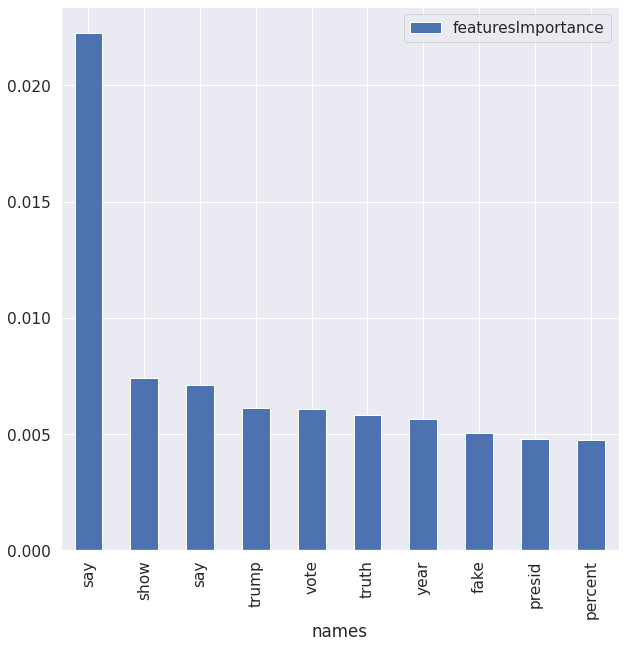

In [ ]:
plotImportance(df_pipe_headline_text.drop(index_Mixture_eq),
               y)